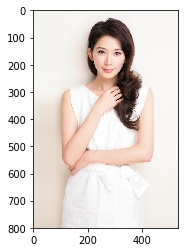

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
I1 = mpimg.imread('C:/Users/joan/Desktop/known_person/Chiling.jpeg')
plt.imshow(I1)

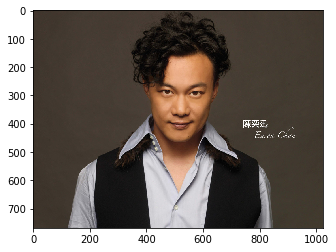

In [11]:
I2 = mpimg.imread('C:/Users/joan/Desktop/known_person/Eason.jpg')
plt.imshow(I2)

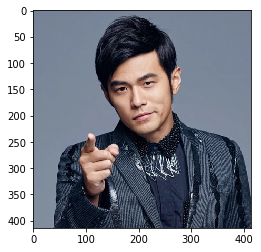

In [12]:
I3 = mpimg.imread('C:/Users/joan/Desktop/known_person/Jay.jpg')
plt.imshow(I3)

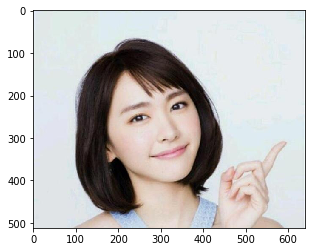

In [13]:
I4 = mpimg.imread('C:/Users/joan/Desktop/known_person/Yui.jpg')
plt.imshow(I4)

In [32]:
flist = [I1,I2,I3,I4]

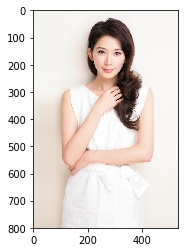

In [37]:
plt.imshow(flist[0])
flist = ['C:/Users/joan/Desktop/known_person/Chiling.jpeg','C:/Users/joan/Desktop/known_person/Eason.jpg'
         ,'C:/Users/joan/Desktop/known_person/Jay.jpg','C:/Users/joan/Desktop/known_person/Yui.jpg']

In [49]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

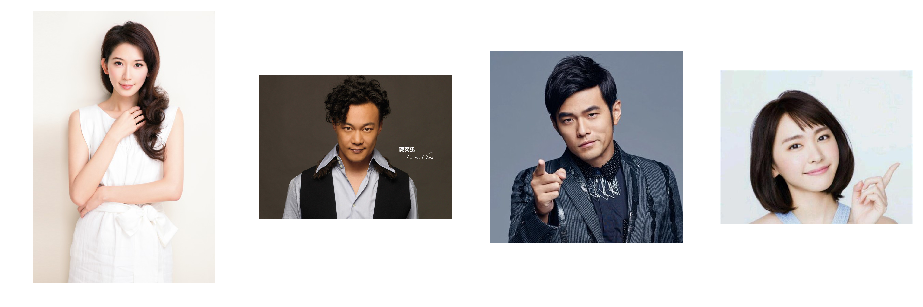

In [50]:
import os
# 最後要記錄出的樣品向量(128 維度) 和標籤(明星名)
encodinglist = []
labels = []
# 一橫列畫幾個人
width = 5
# 總共幾個橫列
height = int(len(flist) / width) + 1
# 整個大圖的size
plt.figure(figsize=(20, 5))
for (i, f) in enumerate(flist):
# Step1. 讀取檔案
    img = face_recognition.load_image_file(f)
# Step2. 把臉的降維向量算出, 用已經做好的cnn, [0] 第一張臉
    face_encoding = face_recognition.face_encodings(img)[0]
# Step3. 抓出臉的方框, 我們這裡沒用到, 但如果你想畫框就會需要
# 這裡的face_locations 可以使用cnn(深度學習) 或者haar(固定特徵) 來得到
# 如果需要快速, 請使用haar, 如果需要更準確, 就使用cnn, 建議可以使用預設haar 即可
    (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
# Step4. 把它加到我自己準備的list 裡
    encodinglist.append(face_encoding)
# Step5. 把檔名前面的人名split 出來
    name = os.path.split(f)[-1].split(".")[0]
# Step6. 把人名到我自己準備的list
    labels.append(name)
# 利用enumerate 得到的i 指定subplot
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    plt.imshow(img)

In [40]:
unknown_flist =['C:/Users/joan/Desktop/unknown_person/unknown1.jpeg']

In [51]:
# 秀一下志玲的臉降維過後的向量
print("維度:", len(encodinglist[0]))
encodinglist[0]

維度: 128


array([-0.03227153,  0.08625291,  0.07415671, -0.15738162, -0.11236724,
       -0.00159185, -0.12994649, -0.07892803,  0.16219291, -0.19429073,
        0.26049092, -0.07877107, -0.20395064, -0.02413503, -0.06144544,
        0.2331699 , -0.18437262, -0.17892419, -0.00448534,  0.05152842,
        0.12032226, -0.00196053, -0.05411414,  0.04053906, -0.15767565,
       -0.3930206 , -0.10566023,  0.01143744, -0.04173426, -0.11058581,
       -0.05135163, -0.01018566, -0.19936135,  0.03904124,  0.04706217,
        0.08614952, -0.00621644, -0.15094967,  0.14164801,  0.04073948,
       -0.35335192,  0.05014927,  0.04323684,  0.1670554 ,  0.14305204,
        0.00171993,  0.00776203, -0.21002765,  0.15489115, -0.1581514 ,
        0.07180607,  0.14276287,  0.06997283,  0.0730279 , -0.00724056,
       -0.10997273,  0.01035523,  0.16323359, -0.17010169, -0.0230736 ,
        0.04858514, -0.08340383,  0.02043438, -0.13797168,  0.14175607,
        0.13433884, -0.10897506, -0.27067041,  0.13201134, -0.15

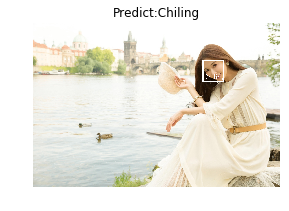

In [42]:
import numpy as np
plt.figure(figsize=(15, 15))
width = 3
height = int(len(unknown_flist) / width) + 1
for (i, f) in enumerate(unknown_flist):
    img = face_recognition.load_image_file(f)
    face_encoding = face_recognition.face_encodings(img)[0]
    # (top, right, bottom, left)
    (top, right, bottom, left) = face_recognition.face_locations(img)[0]
    # rectangle(要畫的圖, 左上座標, 右下座標, 顏色, 粗細)
    size = int(img.shape[0] / 100)
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), size)
    font = cv2.FONT_HERSHEY_DUPLEX
    # face_distance-> 算跟妳傳進去的encodinglist 每一個距離
    results = face_recognition.face_distance(encodinglist, face_encoding)
    # 這裡使用argmin(axis=-1) 稍微難一點, 是得到群集裡最小值的index 部分
    name = labels[np.array(results).argmin(axis=-1)]
    labels.append(name)
    # 把文字放到我的圖上, 文字放在框右移6, 上移15 的位置
    # putText(圖片, 標籤, 起始座標, 字型, 字型大小, 顏色, 粗細)
    # 這裡我有刻意根據框的大小調整字體大小, 如果讀者沒特別需求可以都設成1
    cv2.putText(img, name, (left + 6, bottom - 15),
    font, (right-left)//100 ,
    (255, 255, 255), (right-left)//75)
    plt.subplot(height, width, i + 1)
    plt.title("Predict:" + name)
    plt.axis("off")
    plt.imshow(img)

In [45]:
# 妳可以把跟所有臉的距離列出來, 最小值基本上就是我們的答案
img = face_recognition.load_image_file(unknown_flist[-1])
face_encoding = face_recognition.face_encodings(img)[0]
results = face_recognition.face_distance(encodinglist, face_encoding)
for (i, r) in enumerate(results):
    print("和", labels[i], "的距離:", r)

和 Chiling 的距離: 0.40586385256727064
和 Eason 的距離: 0.71079394070989
和 Jay 的距離: 0.7497046736846528
和 Yui 的距離: 0.463415277849346
